In [2]:
import sqlite3
import pandas as pd

In [5]:
conn = sqlite3.connect('nyc_arrest_data.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table in tables:
    cursor.execute(f'DROP TABLE IF EXISTS {table[0]}')

conn.commit()
conn.close()

In [8]:
conn = sqlite3.connect('nyc_arrest_data.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

[]

In [10]:
df = pd.read_csv(r'C:\Users\deenr\OneDrive\Desktop\Work in Progress\nyc_arrest_data\src\NYPD_Arrests_Data__Historic__20240906.csv')

def find_city(code):
    codes = {'B': 'Bronx', 'S': 'Staten Island', 'K': 'Brooklyn', 'M': 'Manhattan' , 'Q': 'Queens'}
    if pd.isna(code):
        return 'Unknown'
    return codes.get(code, 'Unknown')
    
    return codes[code]

def find_felony(felony):
    felonies = {'F': 'Felony','M': 'Misdemeanor', 'V': 'Violation', 'I': 'Other'}
    if felony in felonies:
        return felonies[felony]
    else:
        return 'Other'

date = df['ARREST_DATE'].str.split("/", n=3, expand=True)
df['year'] = date[2].astype('int32')
df['month'] = date[0].astype('int32')

df['ARREST_BORO'] = df['ARREST_BORO'].apply(find_city)
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].apply(find_felony)

df = df.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD'], axis=1)

df.head()



,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat,year,month
0,08/07/2018,NaN,Felony,Brooklyn,73,45-64,M,BLACK,40.671110,-73.915881,POINT (-73.91588130999997 40.67110980800004),2018,8
1,11/13/2020,ROBBERY,Felony,Bronx,40,25-44,M,BLACK,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026),2020,11
2,07/01/2019,NaN,Felony,Manhattan,23,25-44,M,BLACK HISPANIC,40.789348,-73.947352,POINT (-73.94735241299998 40.78934789300007),2019,7
3,02/22/2020,DANGEROUS DRUGS,Misdemeanor,Manhattan,32,25-44,M,BLACK,40.829163,-73.937272,POINT (-73.93727189399993 40.829163304000076),2020,2
4,11/10/2020,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,Bronx,49,25-44,M,WHITE,40.854826,-73.854880,POINT (-73.85487970999998 40.85482622300003),2020,11


In [11]:
df.isnull().sum()

ARREST_DATE           0
OFNS_DESC          9169
LAW_CAT_CD            0
ARREST_BORO           0
ARREST_PRECINCT       0
AGE_GROUP            17
PERP_SEX              0
PERP_RACE             0
Latitude              1
Longitude             1
Lon_Lat               1
year                  0
month                 0
dtype: int64

In [12]:
df['OFNS_DESC'] = df['OFNS_DESC'].fillna('Unknown')

In [13]:
df = df.dropna()
df.isnull().sum()

ARREST_DATE        0
OFNS_DESC          0
LAW_CAT_CD         0
ARREST_BORO        0
ARREST_PRECINCT    0
AGE_GROUP          0
PERP_SEX           0
PERP_RACE          0
Latitude           0
Longitude          0
Lon_Lat            0
year               0
month              0
dtype: int64

In [16]:
df['LAW_CAT_CD'].unique()

array(['Felony', 'Misdemeanor', 'Violation', 'Other'], dtype=object)

In [14]:
df.to_sql('arrest', conn, if_exists='replace', index='False')

5725504

In [37]:
# ofns_desc time series analysis

query = """ 
SELECT OFNS_DESC, YEAR, COUNT(*) as COUNT
FROM arrest
GROUP BY OFNS_DESC, YEAR
ORDER BY YEAR ASC;
"""
df = pd.read_sql_query(query, conn)

df

,OFNS_DESC,year,COUNT
0,ADMINISTRATIVE CODE,2006,72
1,ALCOHOLIC BEVERAGE CONTROL LAW,2006,284
2,ANTICIPATORY OFFENSES,2006,77
3,ARSON,2006,151
4,ASSAULT 3 & RELATED OFFENSES,2006,31724
...,...,...,...
1173,THEFT OF SERVICES,2023,154
1174,THEFT-FRAUD,2023,186
1175,UNAUTHORIZED USE OF A VEHICLE,2023,630
1176,UNLAWFUL POSS. WEAP. ON SCHOOL,2023,1


In [31]:
df['OFNS_DESC'].unique().tolist()

['ADMINISTRATIVE CODE',
 'ALCOHOLIC BEVERAGE CONTROL LAW',
 'ANTICIPATORY OFFENSES',
 'ARSON',
 'ASSAULT 3 & RELATED OFFENSES',
 "BURGLAR'S TOOLS",
 'BURGLARY',
 'CHILD ABANDONMENT/NON SUPPORT 1',
 'CRIMINAL MISCHIEF & RELATED OFFENSES',
 'CRIMINAL TRESPASS',
 'DANGEROUS DRUGS',
 'DANGEROUS WEAPONS',
 'DISORDERLY CONDUCT',
 'DISRUPTION OF A RELIGIOUS SERVICE',
 'ESCAPE 3',
 'F.C.A. P.I.N.O.S.',
 'FELONY ASSAULT',
 'FORCIBLE TOUCHING',
 'FORGERY',
 'FRAUDS',
 'FRAUDULENT ACCOSTING',
 'GAMBLING',
 'GRAND LARCENY',
 'GRAND LARCENY OF MOTOR VEHICLE',
 'HARASSMENT',
 'HARRASSMENT 2',
 'HOMICIDE-NEGLIGENT,UNCLASSIFIED',
 'HOMICIDE-NEGLIGENT-VEHICLE',
 'INTOXICATED & IMPAIRED DRIVING',
 'INTOXICATED/IMPAIRED DRIVING',
 'JOSTLING',
 'KIDNAPPING & RELATED OFFENSES',
 'LOITERING',
 'LOITERING FOR DRUG PURPOSES',
 'LOITERING/GAMBLING (CARDS, DICE, ETC)',
 'MISCELLANEOUS PENAL LAW',
 'MOVING INFRACTIONS',
 'MURDER & NON-NEGL. MANSLAUGHTER',
 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
 'OFFENSE

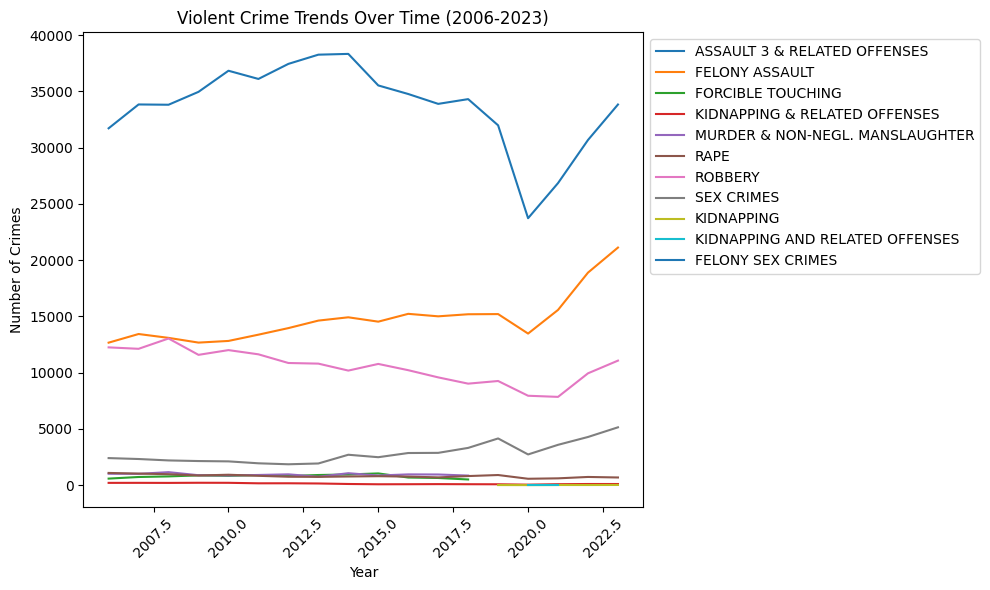

In [39]:
import matplotlib.pyplot as plt

query = """ 
SELECT OFNS_DESC, YEAR, COUNT(*) as COUNT
FROM arrest
WHERE OFNS_DESC IN (
    'MURDER & NON-NEGL. MANSLAUGHTER',
    'FELONY ASSAULT',
    'ASSAULT 3 & RELATED OFFENSES',
    'RAPE',
    'SEX CRIMES',
    'FELONY SEX CRIMES',
    'ROBBERY',
    'KIDNAPPING & RELATED OFFENSES',
    'KIDNAPPING',
    'KIDNAPPING AND RELATED OFFENSES',
    'FORCIBLE TOUCHING'
)
GROUP BY OFNS_DESC, YEAR
ORDER BY YEAR ASC;
"""

violent_crimes = pd.read_sql_query(query, conn)
violent_crimes['year'] = violent_crimes['year'].astype(int)

min_year = violent_crimes['year'].min()
max_year = violent_crimes['year'].max()
years = pd.DataFrame({'year': range(min_year, max_year + 1)})

ls = violent_crimes['OFNS_DESC'].unique().tolist()
plt.figure(figsize=(10, 6))  # Ensure the plot is large enough

for i in ls:
    data = violent_crimes[violent_crimes['OFNS_DESC'] == i]
    full = pd.merge(years, data, on='year', how='left')
    full['COUNT'].fillna(0)
    plt.plot(full['year'], full['COUNT'], label=i)

plt.title(f'Violent Crime Trends Over Time ({min_year}-{max_year})')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<Axes: xlabel='OFNS_DESC', ylabel='OFNS_DESC'>

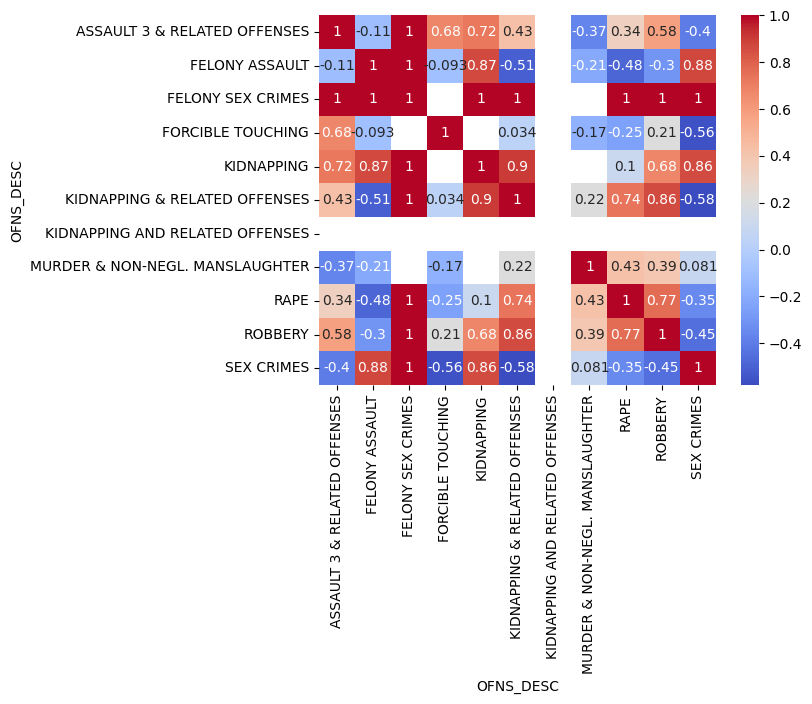

In [43]:
pivoted_df = violent_crimes.pivot(index='year', columns='OFNS_DESC', values='COUNT')
corr_matrix = pivoted_df.corr()

# Plot heatmap using seaborn
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

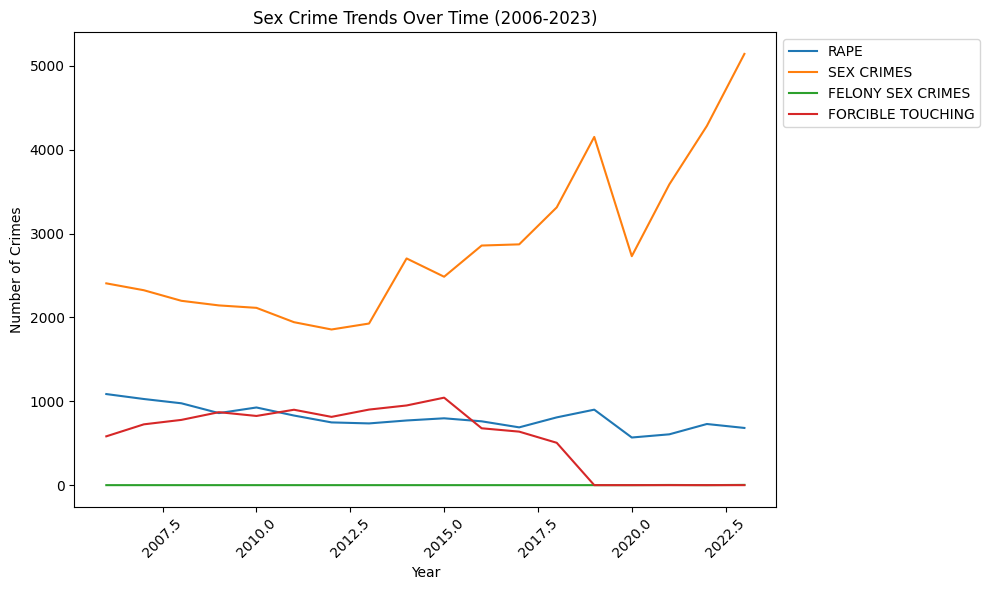

In [41]:
# now more specificity
ls = ['RAPE',
    'SEX CRIMES',
    'FELONY SEX CRIMES',
    'FORCIBLE TOUCHING']

plt.figure(figsize=(10,6))

for i, j in enumerate(ls):
    data = violent_crimes[violent_crimes['OFNS_DESC'] == j]
    full = pd.merge(years, data, on='year', how='left')
    full['COUNT'] = full['COUNT'].fillna(0)
    plt.plot(full['year'], full['COUNT'], label=j)

plt.title(f'Sex Crime Trends Over Time ({min_year}-{max_year})')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



In [ ]:
print